# Assignment 2

In this assignment, we will start with utilizing Sci-Kit learn to implement a linear regression model similar to what we did in Assignment 1. Afterwards, we will be dropping Sci-Kit learning and implementing these algorithms from scratch without the use of machine learning libraries. While you would likely never have to implement your own linear regression algorithm from scratch in practice, such a skill is valuable to have as you progress further into the field and find many scenarios where you actually may need to perform such implementations manually. Additionally, implementing algorithms from scratch will help you better understand the underlying mathematics behind each model.     

## Import Libraries

We will be using the following libraries for this homework assignment. For the questions requiring manual implementation, the pre-existing implementations from Sci-Kit Learn should *not* be used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import operator
%matplotlib inline
mpl.style.use("ggplot")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

## Preparing Data

The file named **dataset1.csv** includes data that was generated from an n-degree polynomial with some gaussian noise. The data has 2 columns - first column is the feature (input) and the second column is its label (output). The first step is to load the data and split them into training, validation, and test sets. A reminder that the purpose of each of the splitted sets are as follows:

* **Training Set**: The sample of data used to fit the model
* **Validation Set**: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.
* **Test Set**: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

In the section below, we load the csv file and split the data randomnly into 3 equal sets. 

*Note that in practice, we usually aim for around a 70-20-10 split for train, valid, and test respectively, but due to limited data in our case, we will do an even split in order to have sufficient data for evaluation* 

In [2]:
# Load the data and split into 3 equal sets
data = pd.read_csv('dataset1.csv', header=None)
data = data.iloc[:, :-1]
train, valid, test = np.split(data, [int(.33*len(data)), int(.66*len(data))])

# We sort the data in order for plotting purposes later
train.sort_values(by=[0], inplace=True)
valid.sort_values(by=[0], inplace=True)
test.sort_values(by=[0], inplace=True)
train.head()
print(valid[1].shape)

(50,)


Let's take a look at what our data looks like

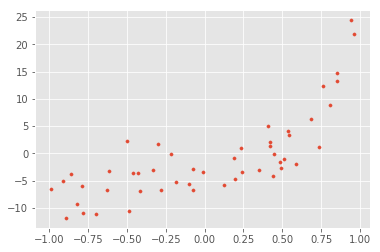

In [3]:
plt.scatter(train[0], train[1], s=10)
plt.show()

Let's apply a linear regression model using Sci-Kit learn and see what the results look like.

In [4]:
# Reshape arrays since sci-kit learn only takes in 2D arrays
train_x = np.array(train[0])
train_y = np.array(train[1])
valid_x = np.array(valid[0])
valid_y = np.array(valid[1])
print(train_x)



[-0.98877038 -0.91361822 -0.89541665 -0.86044258 -0.81936111 -0.78985558
 -0.78074251 -0.69871372 -0.62785813 -0.61815645 -0.49909789 -0.48894309
 -0.45862458 -0.42749769 -0.41426313 -0.33525412 -0.30086343 -0.28325561
 -0.21504383 -0.18476321 -0.09789742 -0.0767185  -0.07385912 -0.00772939
  0.12245686  0.19116681  0.19440008  0.23261559  0.23899974  0.352504
  0.41107763  0.41977846  0.4226282   0.44221619  0.4487821   0.48709971
  0.48984987  0.51020888  0.53765747  0.54528658  0.58964767  0.68241967
  0.73657744  0.76560508  0.80526481  0.85036915  0.85134319  0.94050747
  0.96290148]


In [5]:
train_x = train_x.reshape(-1, 1) #dimension of x axis is inferred
train_y = train_y.reshape(-1, 1)
valid_x = valid_x.reshape(-1, 1)
valid_y = valid_y.reshape(-1, 1)
train_x

array([[-0.98877038],
       [-0.91361822],
       [-0.89541665],
       [-0.86044258],
       [-0.81936111],
       [-0.78985558],
       [-0.78074251],
       [-0.69871372],
       [-0.62785813],
       [-0.61815645],
       [-0.49909789],
       [-0.48894309],
       [-0.45862458],
       [-0.42749769],
       [-0.41426313],
       [-0.33525412],
       [-0.30086343],
       [-0.28325561],
       [-0.21504383],
       [-0.18476321],
       [-0.09789742],
       [-0.0767185 ],
       [-0.07385912],
       [-0.00772939],
       [ 0.12245686],
       [ 0.19116681],
       [ 0.19440008],
       [ 0.23261559],
       [ 0.23899974],
       [ 0.352504  ],
       [ 0.41107763],
       [ 0.41977846],
       [ 0.4226282 ],
       [ 0.44221619],
       [ 0.4487821 ],
       [ 0.48709971],
       [ 0.48984987],
       [ 0.51020888],
       [ 0.53765747],
       [ 0.54528658],
       [ 0.58964767],
       [ 0.68241967],
       [ 0.73657744],
       [ 0.76560508],
       [ 0.80526481],
       [ 0

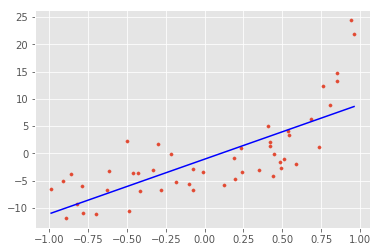

In [6]:
# Apply linear regression model
model = LinearRegression()
model.fit(train_x, train_y)
y_pred = model.predict(train_x)

# Plot the results
plt.scatter(train_x, train_y, s=10)
plt.plot(train_x, y_pred, color='b')
plt.show()

By analyzing the line of best fit above, we can see that a straight line is unable to capture the patterns of the data. This is an example of underfitting. As seen in the latest lecture, we can generate a higher order equation by adding powers of the original features as new features. 

The linear model,: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** $y(x)$ = $w_1 x$ + $w_0$ ** 

can be transformed to a polynomial model such as:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** $y(x)$ = $w_2 x^2$ + $w_1 x$ + $w_0$ ** 

Note that this is still considered to be linear model as the coefficients/weights associated with the features are still linear. x<sup>2</sup> is only a feature. However the curve that we would be fitting in this case is quadratic in nature.

Below we show an example of a quadratic curve being fit to the data

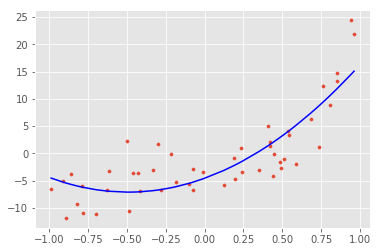

In [7]:
# Create polynomial features with degree 2
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(train_x)

# Apply linear regression
model = LinearRegression()
model.fit(x_poly, train_y)
y_poly_pred = model.predict(x_poly)

# Plot the results
plt.scatter(train_x, train_y, s=10)
plt.plot(train_x, y_poly_pred, color='b')
plt.show()

As you can see, we get a slightly better fit with a quadratic curve. Let's use the model to make predictions on our validation set and compute the mean squared error, which is the error which we wish to minimize.

Mean Squared Error: 20.485214511024225


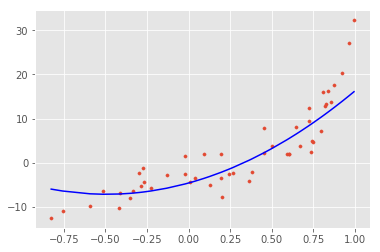

In [8]:
# Make predictions using pretrained model
valid_y_poly_pred = model.predict(polynomial_features.fit_transform(valid_x))

# Calculate root mean squared error
mse = mean_squared_error(valid_y, valid_y_poly_pred)
print("Mean Squared Error: {}".format(mse))

# Plot the prediction results
plt.scatter(valid_x, valid_y, s=10)
plt.plot(valid_x, valid_y_poly_pred, color='b')
plt.show()

## Question 1: Polynomial Regression Using Sci-Kit Learn

Now it is your turn! Following the same format as above, implement a 10-degree polynomial regression model on the training data and plot your results. Use your model to predict the output of the validation set and calculate the mean square error. Report and plot the results. 

[[   0.            1.91630672   41.49038087   15.21251326 -186.43789031
   -34.83215762  274.58029874   93.60745073  -68.83304561  -61.39896387
   -48.43809066]]
Mean Squared Error: 13.115190778263928


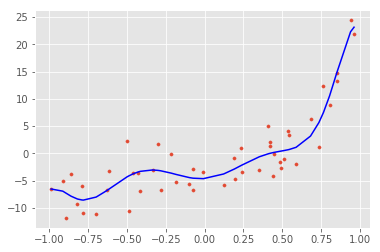

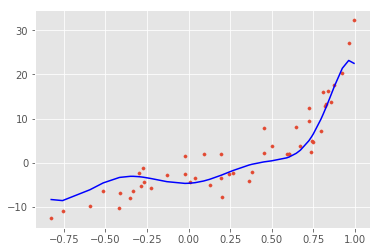

In [9]:
### YOUR CODE HERE - Fit a 10-degree polynomial using Sci-Kit Learn
polynomial_features_10 = PolynomialFeatures(degree=10)
x_poly_degX = polynomial_features_10.fit_transform(train_x)

model = LinearRegression()
model.fit(x_poly_degX, train_y)
print(model.coef_)
y_poly_pred_10 = model.predict(x_poly_degX)
### YOUR CODE HERE - Plot your the curve on the training data set

plt.figure()
plt.scatter(train_x, train_y, s=10)
plt.plot(train_x, y_poly_pred_10, color='b')
### YOUR CODE HERE - Use model to predict output of validation set
valid_y_poly_pred_10 = model.predict(polynomial_features_10.fit_transform(valid_x))

### YOUR CODE HERE - Calculate the RMSE. Report and plot the curve on the validation set.
mse_10 = mean_squared_error(valid_y, valid_y_poly_pred_10)
print("Mean Squared Error: {}".format(mse_10))
plt.figure()
plt.scatter(valid_x, valid_y, s=10)
plt.plot(valid_x, valid_y_poly_pred_10, color='b')
plt.show()

#### Did the root mean squared error go up or down as compared to the 2-degree polynomial curve? Why do you think this is the case?

The RMSE went down compared to the 2 degree polynomial curve, this is most likely due to the reason that RMSE is calculated from the MSE. We know that using the a higher degree polynomial, the slope fits the data more accurately 

Now repeat the above for a 20-degree polynomial regression model.

Mean Squared Error: 106.08567967861322


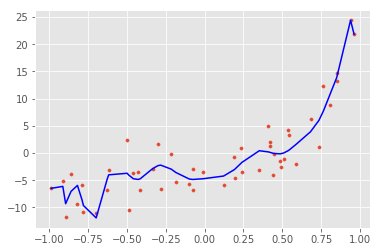

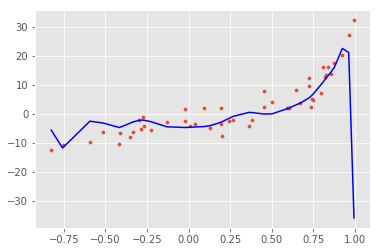

In [10]:
### YOUR CODE HERE - Fit a 20-degree polynomial using Sci-Kit Learn

polynomial_features_20 = PolynomialFeatures(degree=20)
x_poly_degXX = polynomial_features_20.fit_transform(train_x)

model = LinearRegression()
model.fit(x_poly_degXX, train_y)
y_poly_pred_20 = model.predict(x_poly_degXX)
### YOUR CODE HERE - Plot your the curve on the training data set
plt.figure()
plt.scatter(train_x, train_y, s=10)
plt.plot(train_x, y_poly_pred_20, color='b')
### YOUR CODE HERE - Use model to predict output of validation set
valid_y_poly_pred_20 = model.predict(polynomial_features_20.fit_transform(valid_x))

### YOUR CODE HERE - Calculate the RMSE. Report and plot the curve on the validation set.
mse_20 = mean_squared_error(valid_y, valid_y_poly_pred_20)
print("Mean Squared Error: {}".format(mse_20))
plt.figure()
plt.scatter(valid_x, valid_y, s=10)
plt.plot(valid_x, valid_y_poly_pred_20, color='b')
plt.show()

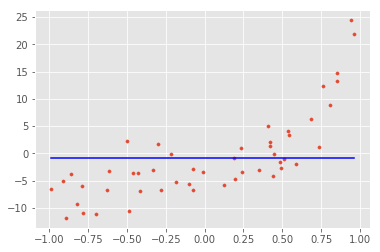

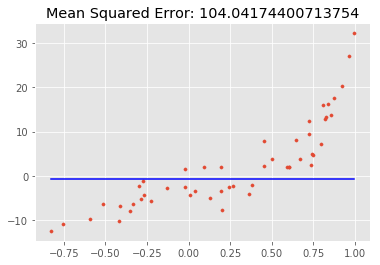

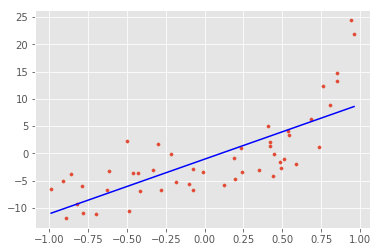

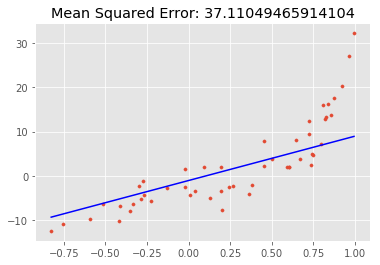

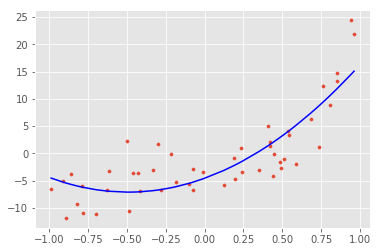

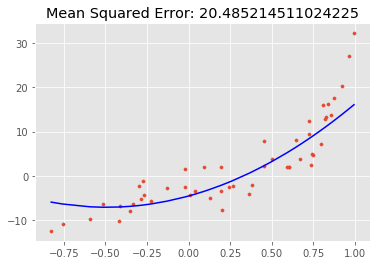

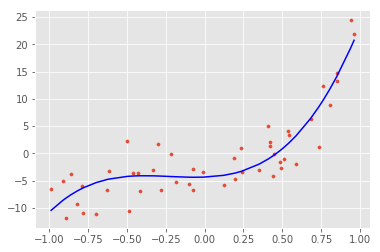

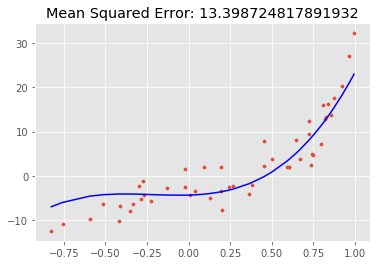

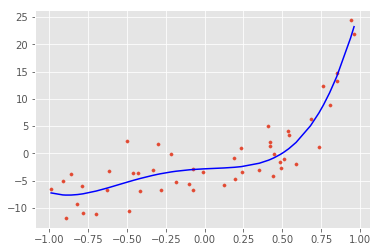

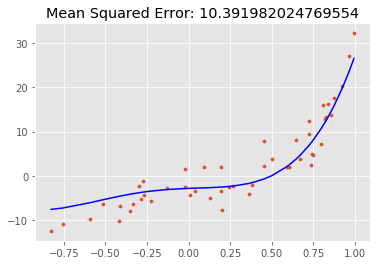

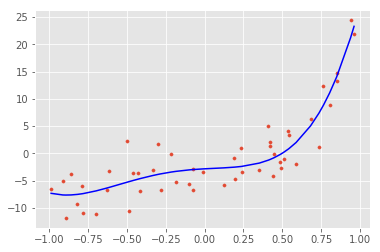

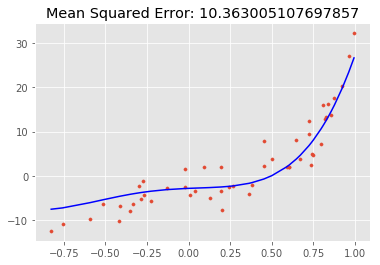

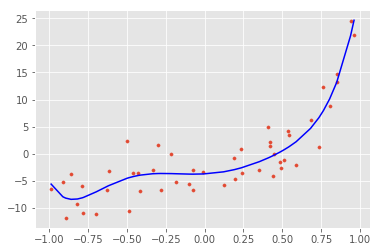

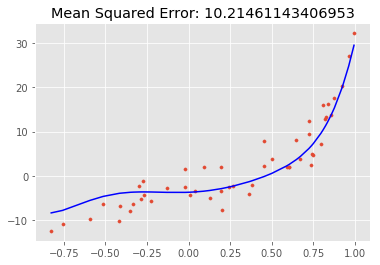

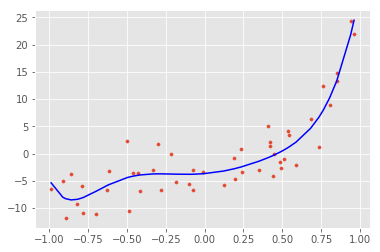

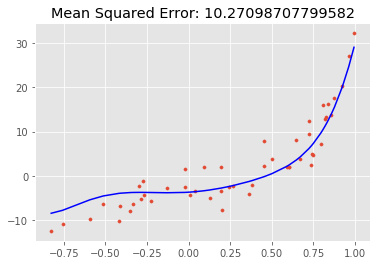

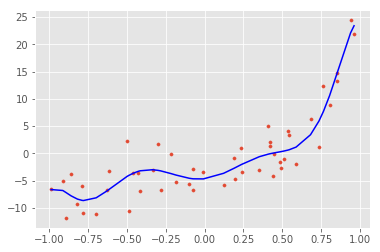

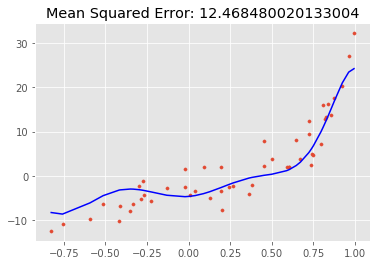

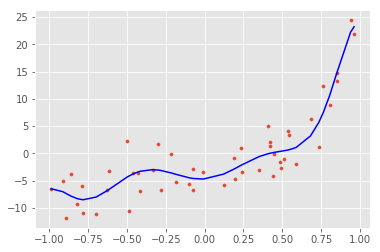

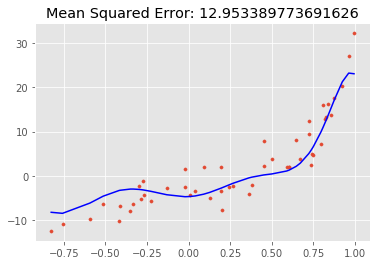

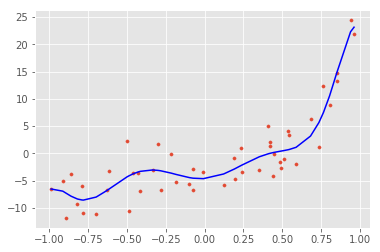

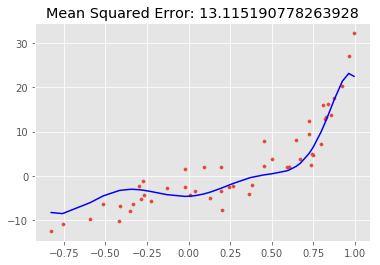

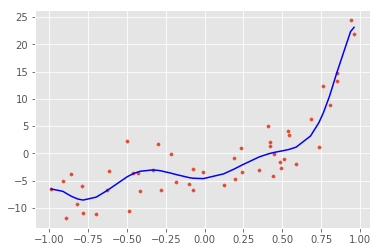

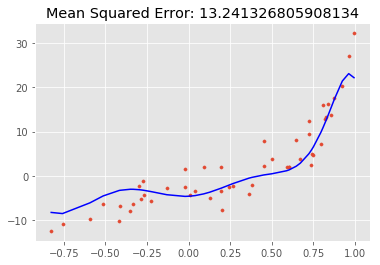

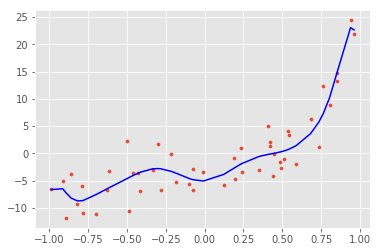

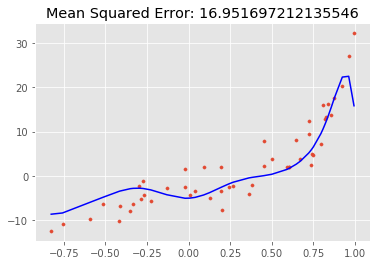

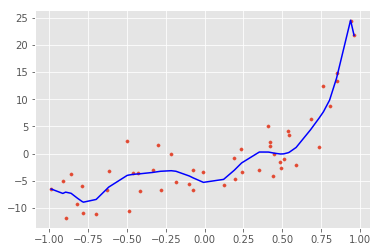

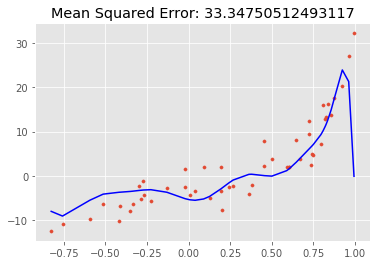

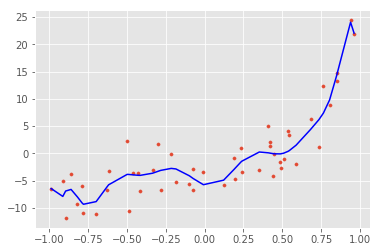

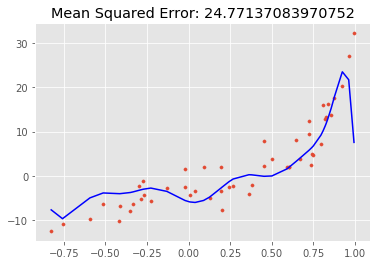

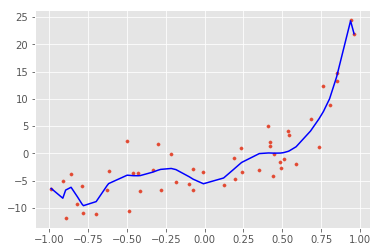

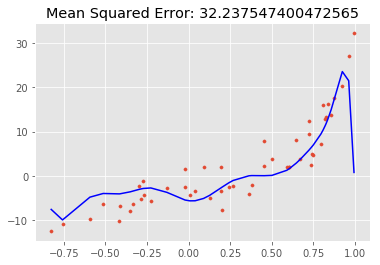

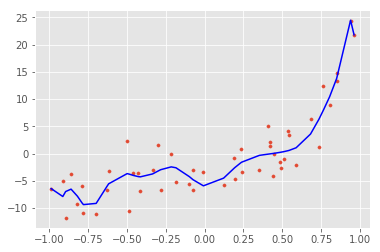

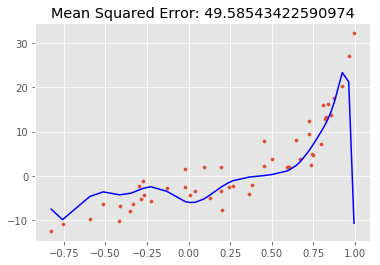

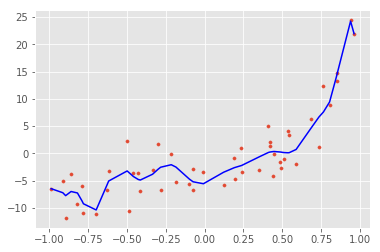

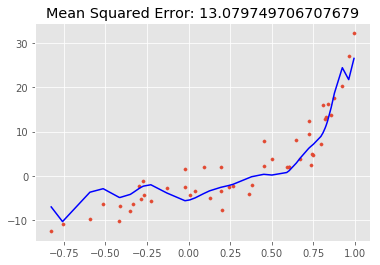

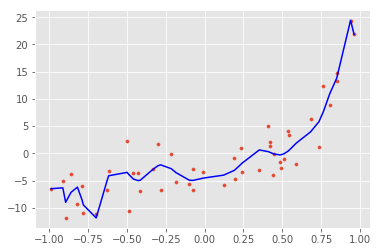

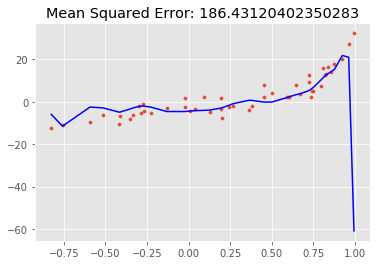

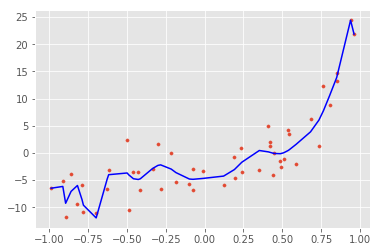

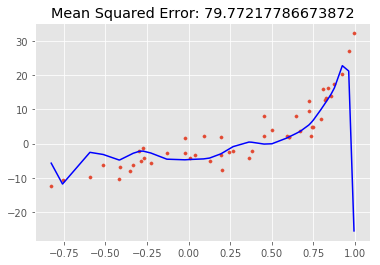

In [11]:
#just gonna check for some degrees
for i in range(20):
    polynomial_features_20 = PolynomialFeatures(degree=i)
    x_poly_degXX = polynomial_features_20.fit_transform(train_x)

    model = LinearRegression()
    model.fit(x_poly_degXX, train_y)
    y_poly_pred_20 = model.predict(x_poly_degXX)
    ### YOUR CODE HERE - Plot your the curve on the training data set
    plt.figure()
    plt.scatter(train_x, train_y, s=10)
    plt.plot(train_x, y_poly_pred_20, color='b')
    ### YOUR CODE HERE - Use model to predict output of validation set
    valid_y_poly_pred_20 = model.predict(polynomial_features_20.fit_transform(valid_x))

    ### YOUR CODE HERE - Calculate the RMSE. Report and plot the curve on the validation set.
    mse_20 = mean_squared_error(valid_y, valid_y_poly_pred_20)
    plt.figure()
    plt.title("Mean Squared Error: {}".format(mse_20))
    plt.scatter(valid_x, valid_y, s=10)
    plt.plot(valid_x, valid_y_poly_pred_20, color='b')
    plt.show()

#### How does the mean square error compare to the previous two models? Why do you think this is the case?

The MSE is much higher due to the higher degree polynomial. Since the polynomial has to obtain the least MSE while conserving its shape, it creates a much higher MSE than the other two.

## Question 2: Manual Implementation

Now it's time to appreciate the hard work that open source developers have put, in order to allow you to implemenent machine learning models without doing any math! No more Sci-Kit learn (or any other libraries like Tensorflow, Pytorch, etc) for the rest of this assignment!

Your first step is to fit a **10-degree polynomial** to the dataset we have been using above. Then using your results, calculate the mean squared error on both the training and validation set. You may use general utility libraries like numpy and pandas matrix computations and data manipulation, but pre-existing implementations of the model itself is prohibited.

A reminder that in polynomial regression, we are looking for a solution for the equation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** $Y(X)$ = $W^T$ * $\phi(X)$ ** 

where

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** $\phi(X)$ = [ $1$, $X$, $X^2$, $X^3$, ..... $X^n$ ] **
 
and the ordinary least square solution in closed form is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;** $W$ = $(X^T X)^{-1}X^TY$ **

Make sure to review the slides, do some research, and/or ask for clarification if this doesn't make sense. You must understand the underlying math before being able to implement this properly.

*Suggestion - Use the original pandas dataframes variables named train, valid, and test instead of the reshaped arrays that were used specifically for Sci-Kit Learn. It will make your computations cleaner and more inuitive.*

train 31   -0.988770
23   -0.913618
32   -0.895417
3    -0.860443
2    -0.819361
37   -0.789856
11   -0.780743
24   -0.698714
6    -0.627858
39   -0.618156
48   -0.499098
12   -0.488943
13   -0.458625
8    -0.427498
35   -0.414263
0    -0.335254
33   -0.300863
17   -0.283256
44   -0.215044
21   -0.184763
18   -0.097897
40   -0.076718
27   -0.073859
5    -0.007729
1     0.122457
26    0.191167
36    0.194400
20    0.232616
41    0.239000
9     0.352504
28    0.411078
19    0.419778
4     0.422628
22    0.442216
10    0.448782
45    0.487100
47    0.489850
16    0.510209
14    0.537657
29    0.545287
43    0.589648
38    0.682420
46    0.736577
15    0.765605
30    0.805265
25    0.850369
42    0.851343
34    0.940507
7     0.962901
Name: 0, dtype: float64
         31        23        32        3         2         37        11  \
0 -0.988770 -0.913618 -0.895417 -0.860443 -0.819361 -0.789856 -0.780743   
0  0.977667  0.834698  0.801771  0.740361  0.671353  0.623872  0.609559   
0 -0.96668

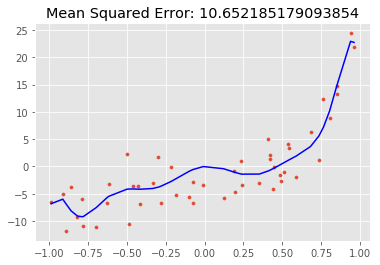

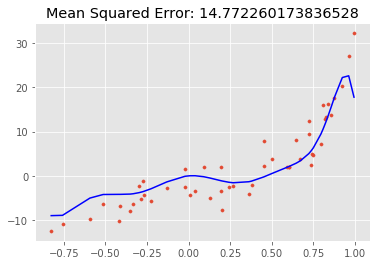

In [12]:
from numpy.linalg import inv
def polynomial_matrix(X, degree):
    matrix = []
    for x in range(1,degree+1):
        matrix.append(X**x)
    return matrix
### YOUR CODE HERE - Create the polynomial matrix ϕ(X)
degree = polynomial_matrix(train[0], 10)
print("train", train[0])
train_set = pd.DataFrame(degree)
print(train_set)
train_set = train_set.T
train_set.columns = ['x','x^2','x^3','x^4','x^5','x^6','x^7','x^8','x^9','x^10']
poly_matrix = train_set.values
poly_matrix
### YOUR CODE HERE - Find the weighted matrix W
#(X^T\cdot X)
step_1 = poly_matrix.T.dot(poly_matrix)
print(step_1.shape)
step_2 = inv(step_1)
print(step_2.shape)
step_3 = step_2.dot(poly_matrix.T)
print(step_3.shape)
wm = step_3.dot(train[1])
print(wm.shape)
print(wm)
### YOUR CODE HERE - Make predictions on the training set and calculate the root mean squared error. Plot the results.

Poly_Data = polynomial_matrix(train[0], 10)
Poly_Data = pd.DataFrame(Poly_Data)

results = (wm @Poly_Data)
#print(results)   
train_mse = mean_squared_error(train[1], results)
#print(train_mse)

plt.figure()
plt.title("Mean Squared Error: {}".format(train_mse))
plt.scatter(train_set['x'], train[1], s=10)
plt.plot(train_set['x'], results, color='b')
### YOUR CODE HERE - Make predictions on the validation set and calculate the mean squared error. Plot the results.

Pred_Data = polynomial_matrix(valid[0],10)
Pred_Data= pd.DataFrame(Pred_Data)

valid_pred = (wm@ Pred_Data)
valid_mse = mean_squared_error(valid[1], valid_pred)
#print(valid_mse)

plt.figure()
plt.title("Mean Squared Error: {}".format(valid_mse))
plt.scatter(valid[0], valid[1], s=10)
plt.plot(valid[0], valid_pred, color='b')

For the rest of the assignment, we will use the other dataset named **dataset2.csv**. First load the csv and split the model into train, valid, and test sets as shown earlier in the assignment.

In [13]:
### YOUR CODE HERE - Load dataset2.csv and split into 3 equal sets
dataset = pd.read_csv('dataset2.csv', header=None)
dataset = dataset.iloc[:, :-1]
Train, Valid, Test = np.split(dataset, [int(.33*len(data)), int(.66*len(data))])

### YOUR CODE HERE - Sort the data in order for plotting purposes later
Train.sort_values(by=[0], inplace=True)
Valid.sort_values(by=[0], inplace=True)
Test.sort_values(by=[0], inplace=True)

Plot the data below to see what it looks like

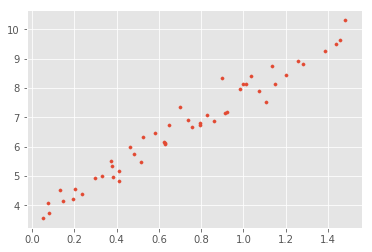

In [14]:
### YOUR CODE HERE - Plot the points for dataset2
plt.scatter(Train[0], Train[1], s=10)
plt.show()

If done properly, you should see that the points fall under a relatively straight line with minor deviations. Looks like a perfect example to implement a linear regression model using the **gradient descent** method ..... without the use of any machine learning libraries!

Since the data falls along a straight line, we can assume the solution follows the form:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** $y(x)$ = $m x$ + $b$ **

A reminder that in gradient descent, we essentially want to iteratively get closer to the minimum of our objective function (the mean squared error), such that:
 
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** MSE($w_0$) > MSE($w_1$) > MSE($w_2$) > ...**

The algorithm is as follows:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** 1) Pick initial $w_0$ randomnly. **

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** 2) For $k=1,2..$ $\Rightarrow$ $w_{k+1}$ = $w_k$ - $\alpha$  $g(w_k)$  where $\alpha > 0$ is the learning rate and $g(w_k)$ is the gradient. **

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** End when | $w_k$ + $1$ - $w_k$ | < $\epsilon$ **


Make sure to review the slides, do some research, and/or ask for clarification if this doesn't make sense. There are many resources online for gradient descent. You must understand the underlying math before being able to implement this properly.

Now once you understand, it is time to implement the gradient descent below. You may set the learning rate to 1e-6 or whatever value you think is best. As usual, calculate the mean squared error and plot your results. This time, training should be done using the training and validation sets, while the final mean squared error should be computed using the testing set.

In [17]:
### YOUR CODE HERE - Implement gradient decent
def cost(X, Y, weight, bias):
    #MSE
    mse = np.power((Y - (weight.T @ X+bias)),2)
    print("The MSE is:", sum(np.sum(mse)/len(Y)))
    return sum(np.sum(mse)/len(Y))
traindata = Train[0][np.newaxis,:]
validdata = Valid[0][np.newaxis,:]
### YOUR CODE HERE - Calculate the the mean squared error and plot the results.
theta = pd.DataFrame([np.random.normal(0, 0.1, 1)])
losses = []
Vlosses = []
alpha = 0.05
num_iterations = 100
weight, loss = gradDescent(traindata, Train[1], theta, 1, alpha, num_iterations, losses)
losses= loss
Vweight, Vloss = gradDescent(validdata, Valid[1], theta, 1, alpha, num_iterations, Vlosses)
Vlosses = Vloss

plt.figure(figsize=[5,5])
plt.plot(range(num_iterations), losses, 'ro')
plt.plot(range(num_iterations), Vlosses, 'b')
plt.title('Loss During Training Using Batch Gradient Descent')
plt.ylabel('Value')
plt.xlabel('Iteration Number')
plt.show()

The MSE is: 34.56658681987386
The MSE is: 31.510318395513004
The MSE is: 28.850624553560603
The MSE is: 26.536046659637893
The MSE is: 24.521803237130698
The MSE is: 22.768923554072114
The MSE is: 21.243493633861696
The MSE is: 19.916000101953742
The MSE is: 18.760759173537696
The MSE is: 17.755419734505253
The MSE is: 16.880530901524015
The MSE is: 16.11916569455279
The MSE is: 15.456593540772909
The MSE is: 14.879995273679926
The MSE is: 14.3782151132582
The MSE is: 13.941544828655617
The MSE is: 13.561535907428759
The MSE is: 13.230836097288407
The MSE is: 12.943047157824083
The MSE is: 12.69260107004783
The MSE is: 12.47465230871189
The MSE is: 12.28498409313048
The MSE is: 12.119926802686011
The MSE is: 11.976286978557576
The MSE is: 11.851285538026891
The MSE is: 11.74250400595836
The MSE is: 11.647837723162446
The MSE is: 11.565455126337524
The MSE is: 11.493762311755928
The MSE is: 11.431372197086993
The MSE is: 11.377077684713353
The MSE is: 11.329828307315415
The MSE is: 11.2

ValueError: operands could not be broadcast together with shapes (1,50) (1,99) 

In [16]:
def gradDescent(X, Y, w, bias, alpha, times, loss):
    for i in range(times):
        m = (w.T@X) + bias
        cost_fn = cost(X, Y, w, bias)
        loss.append(cost_fn)
        g = -(2/len(Y))*np.sum(X*(Y - m))
        g = sum(g)
        w = w-(alpha*g)
        #print("weight: ",w)
    return w, loss

I really hope I don't have to come back to this.
epsilon = 0.00001
w = 2
np.reshape(w, (-1,1))
alpha = 4
absvalue = 1
while(absvalue >= epsilon):
    w_w=w
    w = w - (alpha/len(Train[0]))*(np.sum((Train[0] * w- Train[1])*Train[0]))
    w = int(w)
    print(w)
    absvalue = abs(w-w_w)
    print("absvalue : ", absvalue)
    w = np.array([w])
    traindata= Train[0][np.newaxis,:]
    print(traindata.shape)
    cost(traindata,Train[1], w, 0.001)
    print(w)

## Turning In

1. Convert this notebook to a regular python file (file -> download as -> python)

2. Submit both the notebook and python file via a pull request as specified in the README